In [6]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: C:\Users\Micheal\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [7]:
!pip install yellowbrick


[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: C:\Users\Micheal\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [8]:
#Importing libraries for the project
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)    

In [9]:
# loading of datasets
data = pd.read_csv("marketing_campaign.csv")

print("Number of datapoints:", len(data))

Number of datapoints: 2240


In [10]:
data.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


In [11]:
# Corrected code line to load the data since the data is separated bt tab(t)
data = pd.read_csv("marketing_campaign.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [12]:
# Getting datasets information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [13]:
# since we have some missing number in income column, we need to drop the rows with missing values
data = data.dropna()
print("Number of datapoints:", len(data))

Number of datapoints: 2216


In [14]:
# Getting datasets information after dropping the rows with missing/null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [15]:
# we want to convert Dt_customer(The date a new customer was fully enrolled) column from object to date datatype
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)

# Creating a list of date and looping it into the list
# We want to know how long the person has been a customer for and also checking the newest and oldest customer's enrollment day
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
# Dates of the newest and oldest recorded customer
print("The newest customer's enrollment date in the records:", max(dates)) 
print("The oldest customer's enrollment date in the records:", min(dates)) 

The newest customer's enrollment date in the records: 2014-06-29
The oldest customer's enrollment date in the records: 2012-07-30


In [16]:
# Created a feature  "Customer_for"
days = []
d1 = max(dates) # newest customer 
for i in dates:
    delta = d1 -i
    days.append(delta)
data["Customer_for"] = days
data["Customer_for"] = pd.to_numeric(data["Customer_for"], errors = "coerce")
    

In [17]:
# we want to know what our categorical columns like  marital_status  and education comprise of
print("Total Categories in the feature Marital_status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total Categories in the feature Education:\n", data["Education"].value_counts())

Total Categories in the feature Marital_status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total Categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In [20]:
#Feature Engineering, creating new columns for the analysis

# Age of Customer today
data["Age"] = 2025 - data["Year_Birth"]

# Total Spendings on various items
data["Total_Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

# Feature indicating total children living in the household
data["Total_Children"] = data ["Kidhome"] + data ["Teenhome"]

# Deriving living siuation by marital status "Alone"
data["Living_With"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Single":"Alone", "Divorced":"Alone", "Widow":"Alone", "Alone":"Alone", "Absurd":"Alone","YOLO":"Alone"})

# Total members in the household
data["Family_size"] = data["Living_With"].replace({"Alone": 1, "Partner":2}) + data["Total_Children"]

# Pertaining Parenthood
data["is_Parent"] = np.where(data.Total_Children > 0,1,0)

# Segmenting education levels in three regions
data["Education"] = data["Education"].replace({"Basic":"Undergraduate", "2n Cycle":"Undergraduate", "Graduation":"Grduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# for name clarity
data = data.rename(columns={"MntWines":"Wines", "MntFruits":"Fruits", "MntMeatProducts":"Meat", "MntFishProducts":"Fish", "MntSweetProducts":"Sweets", "MntGoldProds":"Gold"})
                            

In [21]:
# Dropping some of the columns not needed for the analysis
df_drop = ["Marital_Status","Dt_Customer", "Z_CostContact", "Z_Revenue","ID"]
data = data.drop(df_drop, axis=1)

In [22]:
# Checking the data description after the feature engineering
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_for,Total_Spent,Total_Children,Age,Family_size,is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,607.075361,0.947202,56.179603,2.592509,0.714350
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,602.900476,0.749062,11.985554,0.905722,0.451825
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,5.000000,0.000000,29.000000,1.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,69.000000,0.000000,48.000000,2.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,396.500000,1.000000,55.000000,3.000000,1.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,1048.000000,1.000000,66.000000,3.000000,1.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,2525.000000,3.000000,132.000000,5.000000,1.000000


Relative Plot of some selected feature: A Data Subset


<Figure size 800x550 with 0 Axes>

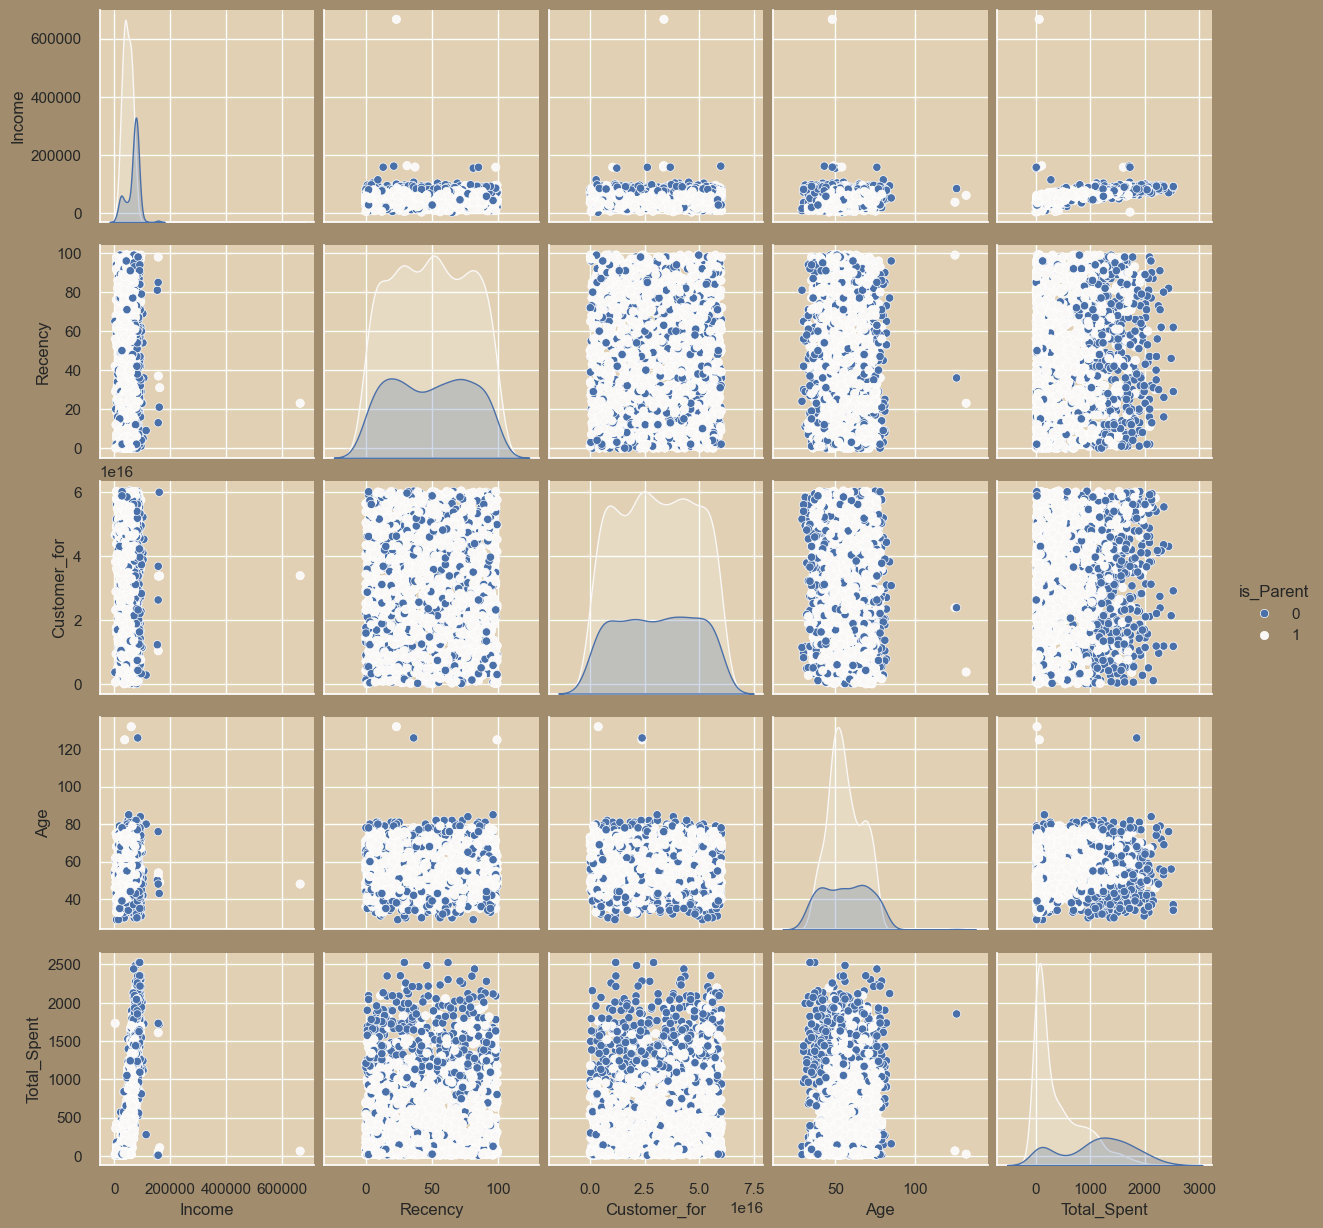

In [27]:
# Plot some selected features
# Setting up colors preferences

sns.set(rc={"axes.facecolor":"E1D0B3","figure.facecolor":"A18D6D"})
pallet = ["#4A70A9", "#EFECE3", "8FABD4", "000000", "D9CFC7", "C9B59C"]
cmap = colors.ListedColormap(["#4A70A9", "#EFECE3", "8FABD4", "000000", "D9CFC7", "C9B59C"])

# Plotting following features
To_plot = ["Income", "Recency", "Customer_for", "Age", "Total_Spent", "is_Parent"]
print("Relative Plot of some selected feature: A Data Subset")
plt.figure()
sns.pairplot(data[To_plot], hue= "is_Parent", palette = (["#4A70A9", "#F9F8F6"])) #F9F8F6, #EFECE3

plt.show()

In [29]:
# Dropping the outliers by setting a cap on Age and Income
data = data[(data["Age"] < 90)]
data = data[(data["Income"] < 600000)]
print("datapoint after outliers removal:", len(data))

datapoint after outliers removal: 2212


Relative Plot of some selected feature: A Data Subset


<Figure size 800x550 with 0 Axes>

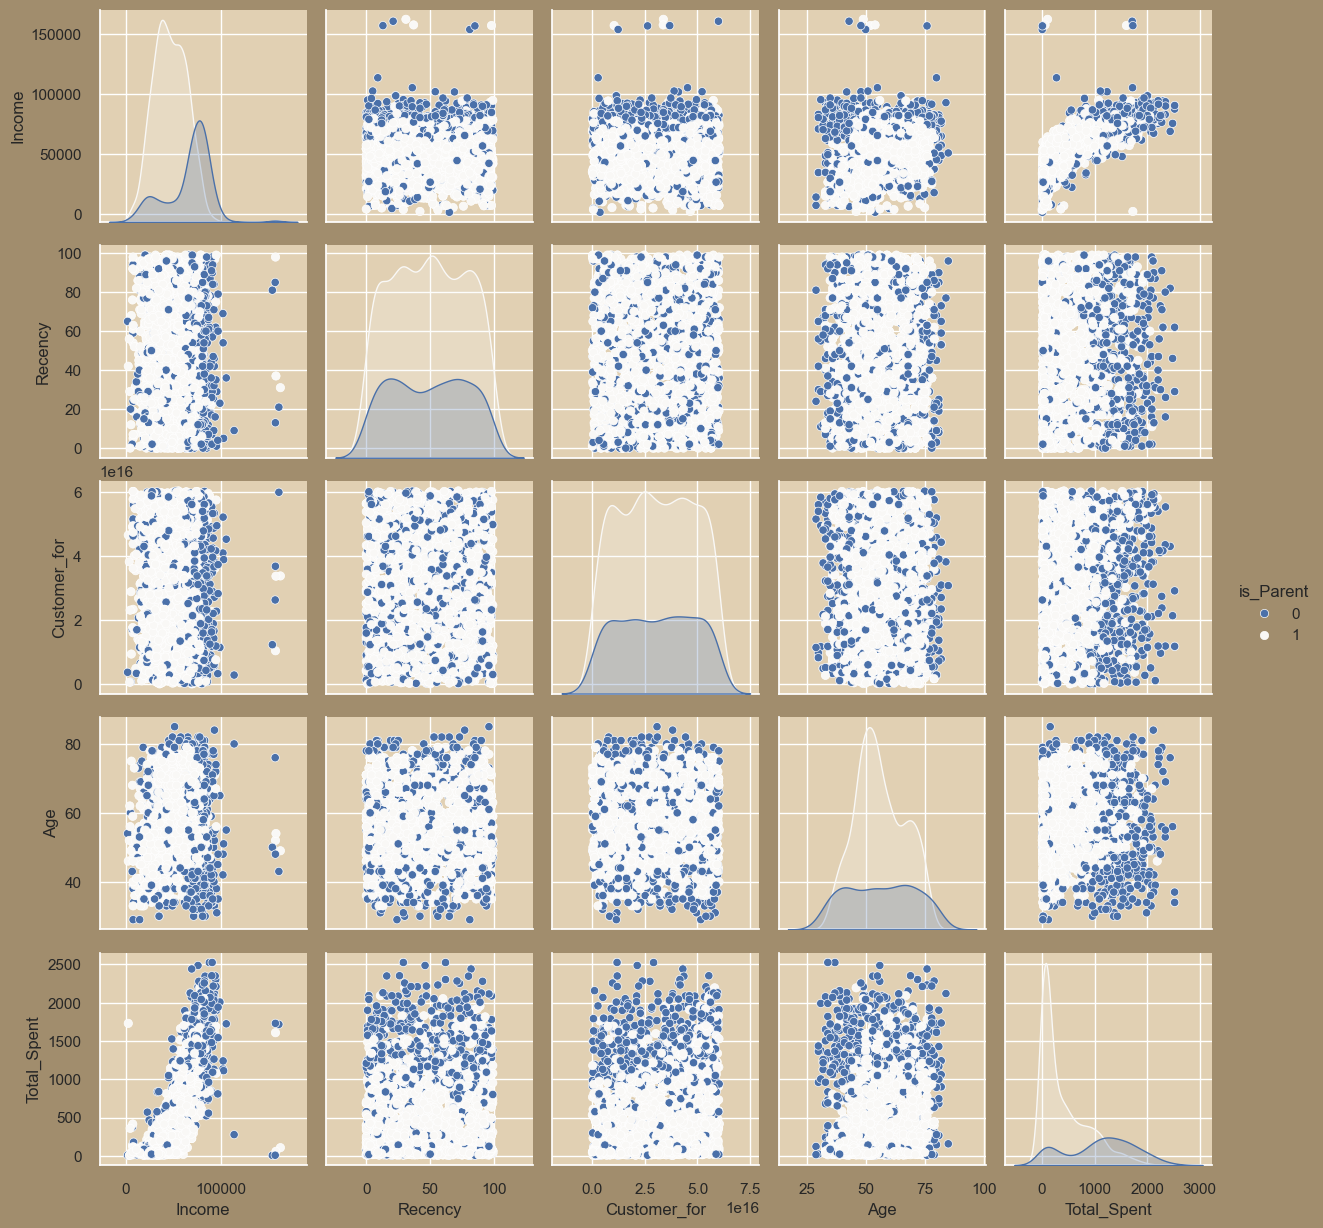

In [30]:
# After the outliers removal

# Plot some selected features
# Setting up colors preferences

sns.set(rc={"axes.facecolor":"E1D0B3","figure.facecolor":"A18D6D"})
pallet = ["#4A70A9", "#EFECE3", "8FABD4", "000000", "D9CFC7", "C9B59C"]
cmap = colors.ListedColormap(["#4A70A9", "#EFECE3", "8FABD4", "000000", "D9CFC7", "C9B59C"])

# Plotting following features
To_plot = ["Income", "Recency", "Customer_for", "Age", "Total_Spent", "is_Parent"]
print("Relative Plot of some selected feature: A Data Subset")
plt.figure()
sns.pairplot(data[To_plot], hue= "is_Parent", palette = (["#4A70A9", "#F9F8F6"])) #F9F8F6, #EFECE3

plt.show()

In [32]:
# Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print ("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [35]:
# Label Encoding the object dtypes, in order to convert all to numeric for the analysis
LE = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(LE.fit_transform)

print("All features are now numerical")    

All features are now numerical


In [36]:
# Checking the info for confirmation
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2212 non-null   int64  
 1   Education            2212 non-null   int64  
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   int64  
 4   Teenhome             2212 non-null   int64  
 5   Recency              2212 non-null   int64  
 6   Wines                2212 non-null   int64  
 7   Fruits               2212 non-null   int64  
 8   Meat                 2212 non-null   int64  
 9   Fish                 2212 non-null   int64  
 10  Sweets               2212 non-null   int64  
 11  Gold                 2212 non-null   int64  
 12  NumDealsPurchases    2212 non-null   int64  
 13  NumWebPurchases      2212 non-null   int64  
 14  NumCatalogPurchases  2212 non-null   int64  
 15  NumStorePurchases    2212 non-null   int64 

In [37]:
# Creating a copy of data
ds =  data.copy()

# Creating a subset of dataframe by dropping the features on deals accepted and promotions

cols_del = ["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Complain", "Response"]
ds = ds.drop(cols_del, axis=1)

# Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns= ds.columns)
print("All features are now scaled")

All features are now scaled


In [38]:
# Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_for,Total_Spent,Total_Children,Living_With,Age,Family_size,is_Parent
0,-1.018352,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,...,2.503607,-0.555814,0.692181,1.527721,1.676245,-1.264598,-1.349603,1.018352,-1.758359,-1.581139
1,-1.274785,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,...,-0.571340,-1.171160,-0.132545,-1.189011,-0.963297,1.404572,-1.349603,1.274785,0.449070,0.632456
2,-0.334530,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,...,-0.229679,1.290224,-0.544908,-0.206048,0.280110,-1.264598,0.740959,0.334530,-0.654644,-1.581139
3,1.289547,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,...,-0.913000,-0.555814,0.279818,-1.060584,-0.920135,0.069987,0.740959,-1.289547,0.449070,0.632456
4,1.033114,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,...,0.111982,0.059532,-0.132545,-0.951915,-0.307562,0.069987,0.740959,-1.033114,0.449070,0.632456


In [40]:
# In order to use the PCA, we need to reduce the number of columns
# Initiating PCA to reduce dimensions,features to 3

pca = PCA(n_components =3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2","col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-9.636656e-17,2.881043,-5.940425,-2.568846,-0.778364,2.396043,7.497488
col2,2212.0,-1.349132e-16,1.775412,-4.707775,-1.442521,0.002480,1.352527,6.177465
col3,2212.0,-4.738022e-17,1.383811,-4.413568,-0.966622,0.066201,0.953847,4.901713


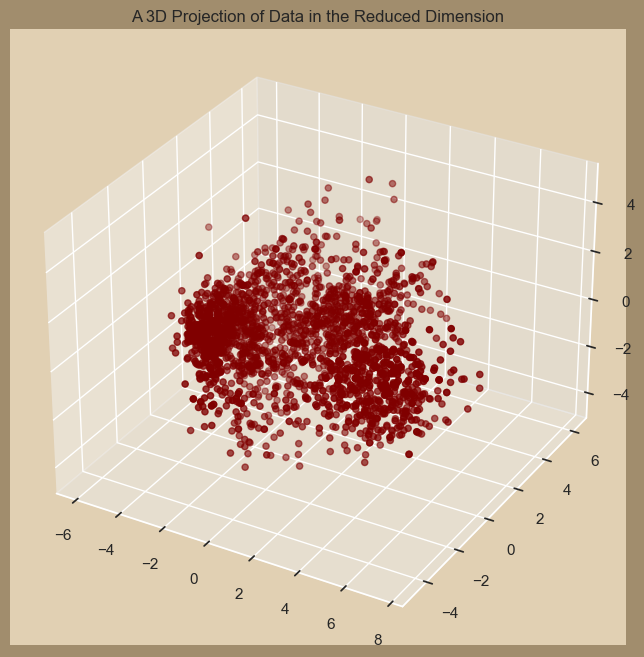

In [43]:
# A 3D projection of Data in the reduced dimension
x= PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

# To Plot
fig = plt.figure(figsize =(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o")
ax.set_title("A 3D Projection of Data in the Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


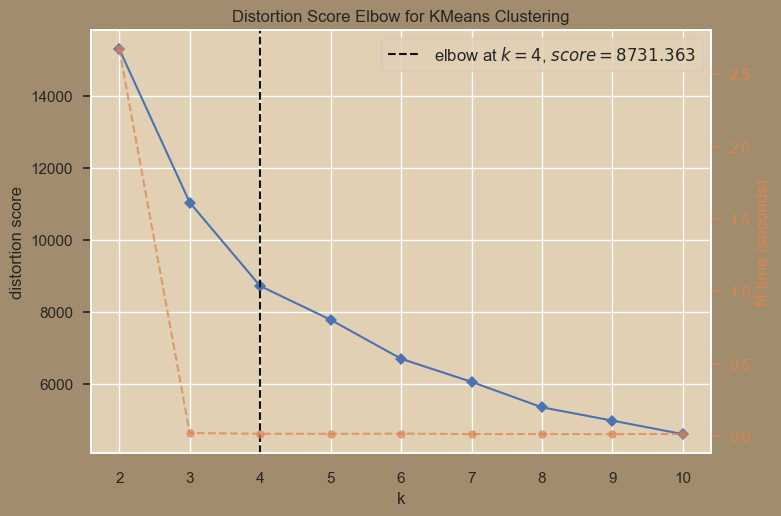

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
# Using the elbow method to find numbers of clusters to make
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [44]:
# Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
what_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = what_AC

# Adding the clusters feature to the original dataframe
data["Clusters"] = what_AC

In [62]:
# Plotting the clusters
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, 
           s=40, 
           c=PCA_ds["Clusters"], 
           marker='o', 
           cmap=cmap)

ax.set_title("The Plot of the clusters")
plt.show()

ValueError: Invalid RGBA argument: '8FABD4'

Error in callback <function _draw_all_if_interactive at 0x000001D796B58C20> (for post_execute):


AttributeError: 'Path3DCollection' object has no attribute '_axlim_clip'

AttributeError: 'Path3DCollection' object has no attribute '_axlim_clip'

<Figure size 1000x800 with 1 Axes>

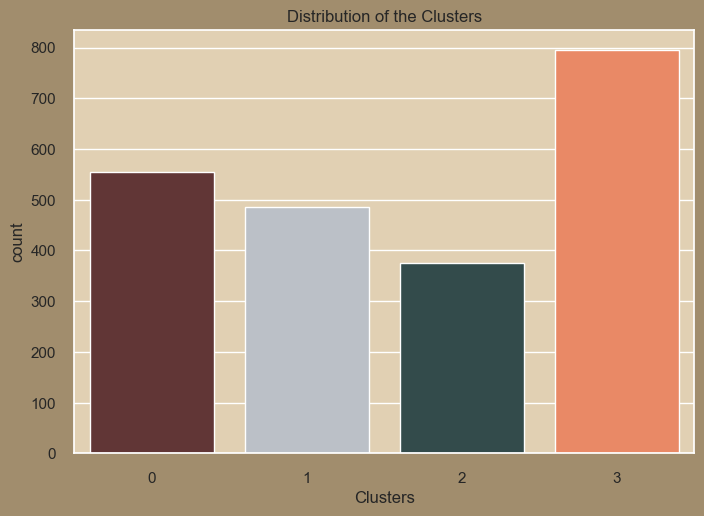

In [69]:
# Plotting countplot of clusters
pallet = ["#682F2F", "#B9C0C9", "#2F4F4F", "#FF7F50"]
pl = sns.countplot(x=data["Clusters"], palette=pallet)
pl.set_title("Distribution of the Clusters")
plt.show()

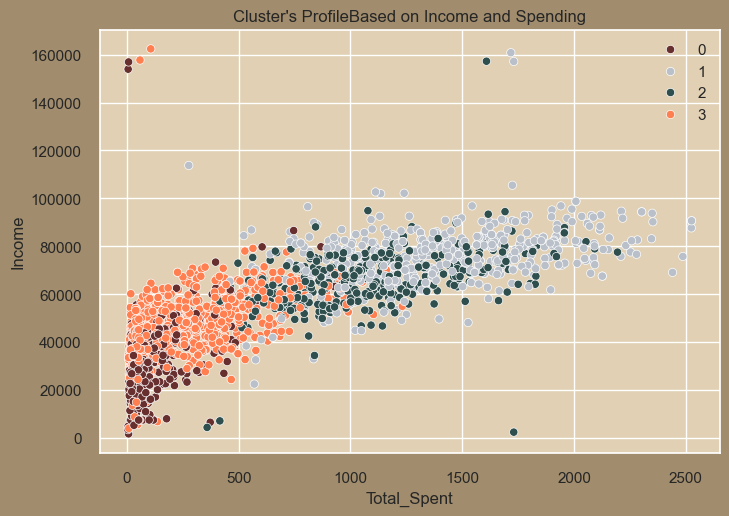

In [70]:
pl = sns.scatterplot(data =data, x=data["Total_Spent"], y=data["Income"], hue=data["Clusters"],palette =pallet)
pl.set_title("Cluster's ProfileBased on Income and Spending")
plt.legend()
plt.show()

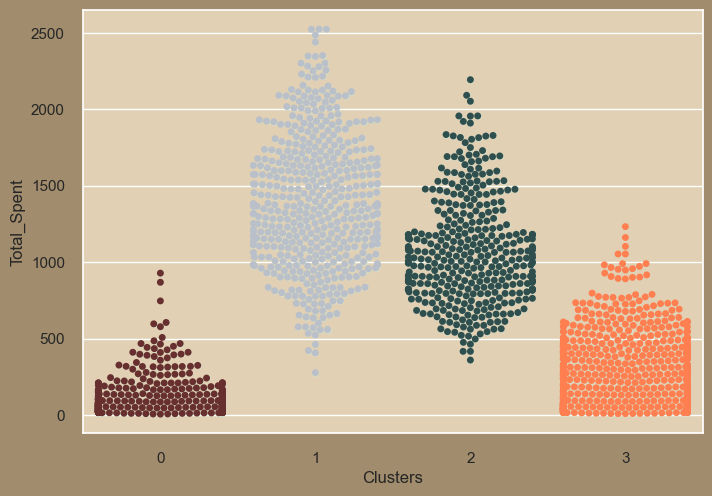

In [71]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Total_Spent"], color="#CBEDDD", alpha=0.5)
pl=sns.swarmplot(x=data["Clusters"], y=data["Total_Spent"], palette=pallet)
plt.show()            

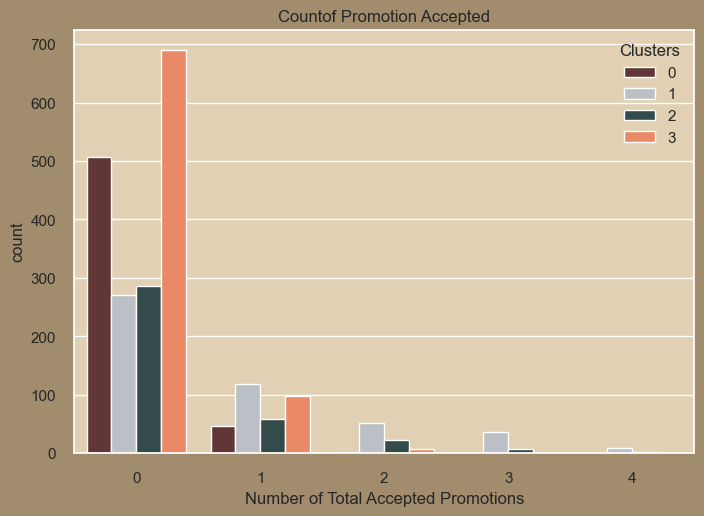

In [73]:
# Creating a feature to get a sum of accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]

# Plotting count of total campaign accepted
plt.figure()
pl = sns.countplot(x=data["Total_Promos"], hue=data["Clusters"], palette =pallet)
pl.set_title("Countof Promotion Accepted")
pl.set_xlabel("Number of Total Accepted Promotions")
plt.show()

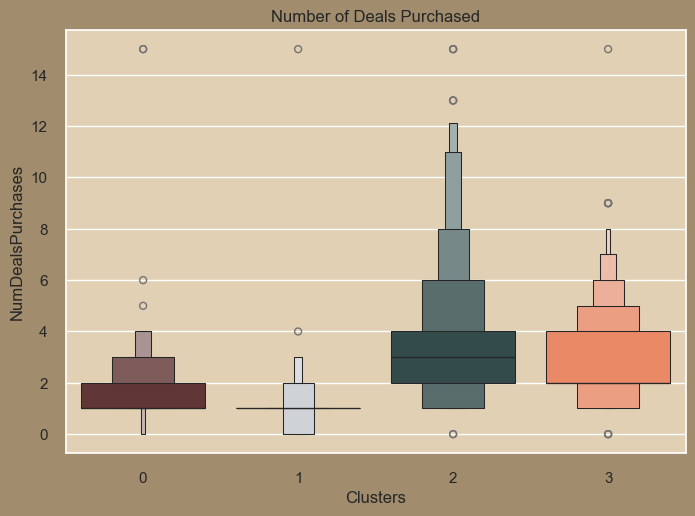

In [75]:
# Plotting the number of deals purchased
plt.figure()
pl = sns.boxenplot(y=data["NumDealsPurchases"], x=data["Clusters"], palette =pallet)
pl.set_title("Number of Deals Purchased")
plt.show()
                

<Figure size 800x550 with 0 Axes>

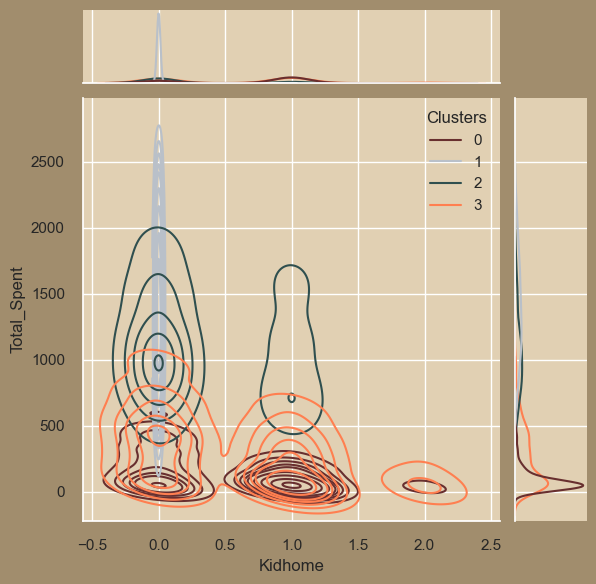

<Figure size 800x550 with 0 Axes>

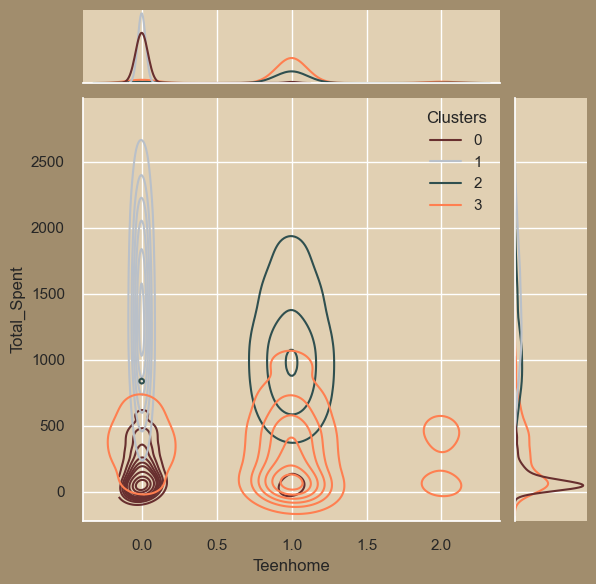

<Figure size 800x550 with 0 Axes>

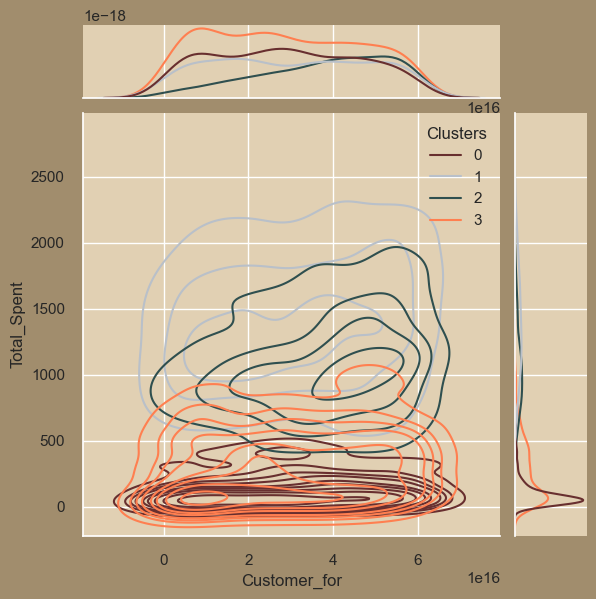

<Figure size 800x550 with 0 Axes>

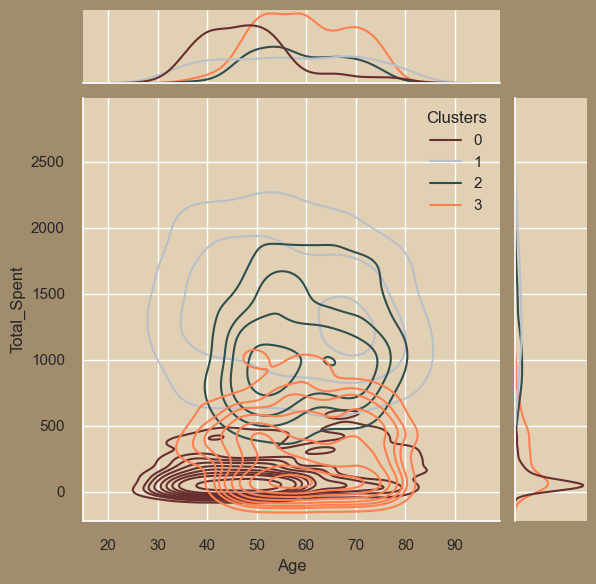

<Figure size 800x550 with 0 Axes>

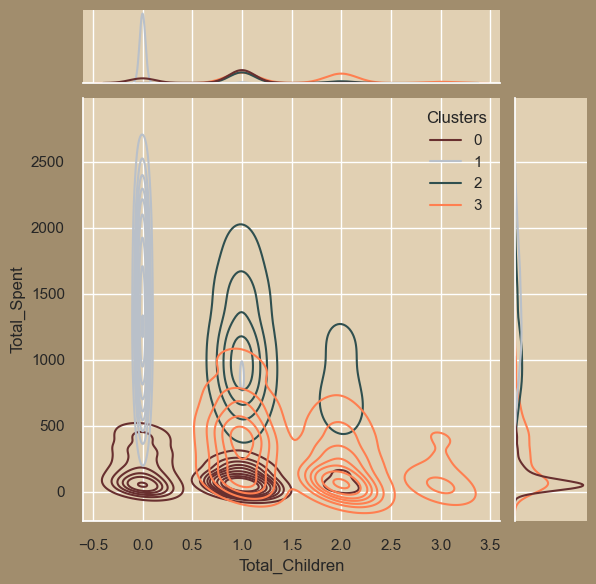

<Figure size 800x550 with 0 Axes>

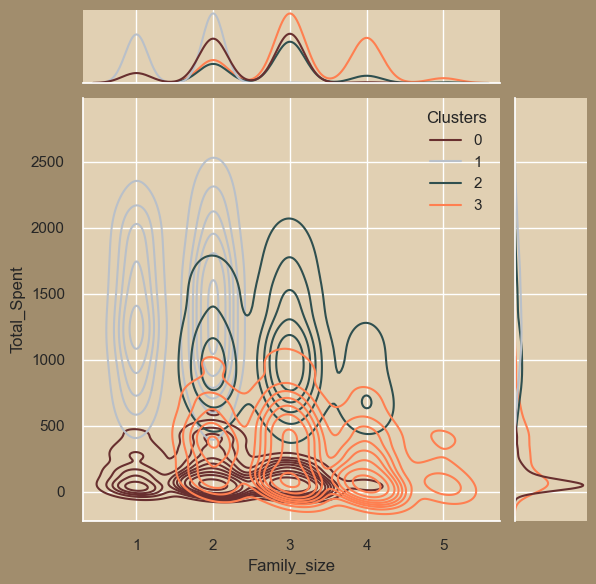

<Figure size 800x550 with 0 Axes>

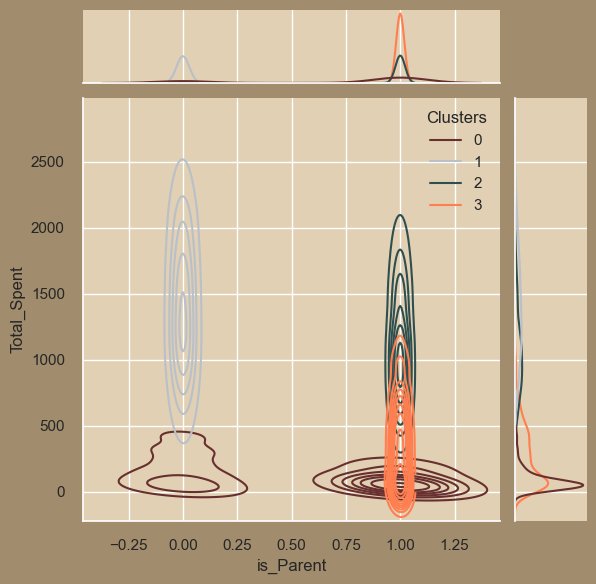

<Figure size 800x550 with 0 Axes>

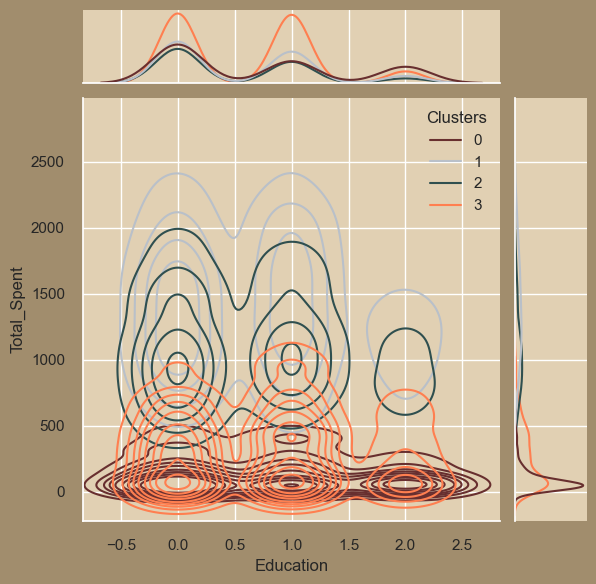

<Figure size 800x550 with 0 Axes>

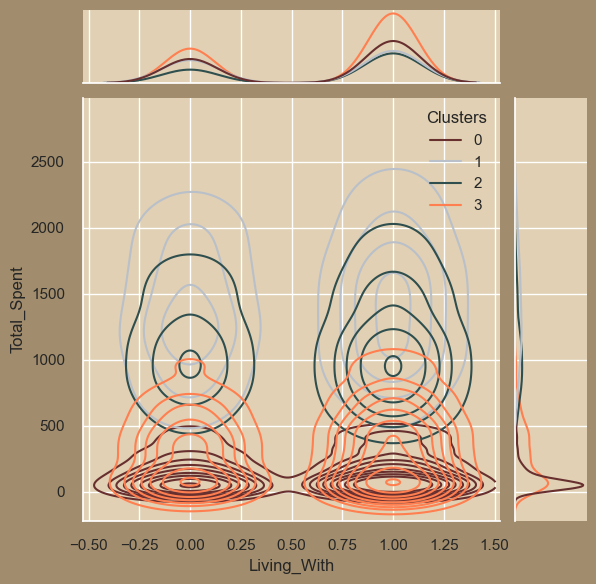

In [83]:
df = ["Kidhome", "Teenhome", "Customer_for", "Age", "Total_Children", "Family_size", "is_Parent", "Education", "Living_With"]      
for i in df:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Total_Spent"], hue=data["Clusters"], kind="kde", palette = pallet)
    plt.show()